In [1]:
import iamend_ci as ci

In [30]:
%whos

Variable     Type       Data/Info
---------------------------------
a            int        5
bo           list       n=7
ci           module     <module 'iamend_ci' from <...>\iamend_ci\\__init__.py'>
data         list       n=2
datacorr     list       n=2
dp           float      0.015
f            ndarray    41: 41 elems, type `float64`, 328 bytes
fig          Figure     Figure({\n    'data': [{'<...>, 'zeroline': False}}\n})
figz1        Figure     Figure({\n    'data': [{'<...>, 'zeroline': False}}\n})
mup          int        1
resultado    tuple      n=2
resultados   tuple      n=2
sig          float      4000000.0
z1eff        ndarray    1: 1 elems, type `float64`, 8 bytes


In [3]:
help(ci.bo)

Help on module iamend_ci.bo in iamend_ci:

NAME
    iamend_ci.bo - Modulo con los valores geometricos nominales para las bobinas

DATA
    bobc = [0.004, 0.0045, 0.01, 216, 0.0004, 1, 0.000353]
    bobm = [0.00115, 0.00295, 0.00248, 387, 0.0007, 14.55, 0.00037575]
    bobpp1 = [0.003, 0.00456, 0.00502, 253, 0.00116, 5.53, 0.00034585]
    mu0 = 1.2566370614359173e-06
    z0pp1 = (5.53+0.00034585j)

FILE
    c:\users\fernando\documents\github\iamend_ci\iamend_ci\bo.py




In [4]:
ci.bo.mu0

1.2566370614359173e-06

In [11]:
help(ci.so)

Help on module iamend_ci.so in iamend_ci:

NAME
    iamend_ci.so - Modulo para el procesamiento de los archivos CVS del solartron

FUNCTIONS
    corr(f, bo, dataraw, Vzu='all', pltr=0)
        corrige y normaliza los datos, toma como input el vector de frecuencias, la info de la bobina y los datos
        devuelve una lista de arrays, cada array es la impedancia compleja corregida y normalizada para cada frecuencia, parte real y parte imaginaria
        para recuperar la parte real  (.real) e imaginaria (.imag)
    
    csv2data(files, separador)
    
    datamean(data)
    
    dzcorr(aire, file, sep)
        # cargo datos del aire
    
    dzcorr2(aire, file, sep)
        cargo datos del aire
    
    dzcorrnorm(dataraw, Vzu, Z0)
    
    findnear(A, x)
    
    fitz0(bob, parametro, val, data)
    
    getf(data)
        obtiene el vector de frecuencias de los datos
    
    iamp(data, vrms)
        calculo
    
    l0fit(bob, parametro, val, data)
    
    load(path=0)
        carg

### Carga  y correccion datos

In [5]:
data=ci.so.load('C:/Users/fernando/tesis/labs/impedancias/pp1/enero 18')

C:/Users/fernando/tesis/labs/impedancias/pp1/enero 18
0 EXP00.csv
1 EXP3948.csv
2 EXPm316p2.csv


In [47]:
f=ci.so.getf(data)
bo=ci.bo.bobpp1



datacorr=ci.so.corr(f,bo,data)

### grafico datos
uso la libreria plotly para ver todos las mediciones al mismo tiempo

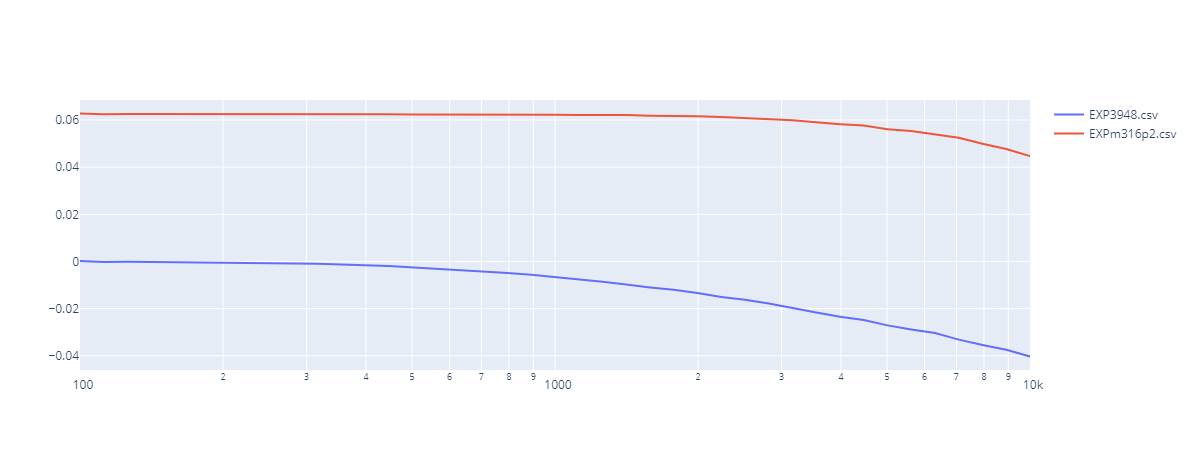

In [11]:
a=ci.plt.semilog(f,datacorr)

uso matplotlib, mas rapida y liviana

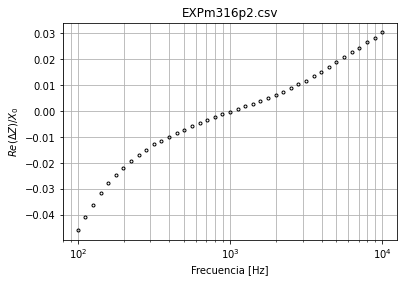

In [57]:
ci.plt.re(f,datacorr,1)

## Ajuste de datos
* primero el lift-off (cn.fit.z1) sobre el patron
* luego $\mu_r$ (cn.fit.mu) sobre la muestra

In [16]:
help(ci.fit)

Help on module iamend_ci.fit in iamend_ci:

NAME
    iamend_ci.fit - Modulo con las funciones para fitear impedancias

FUNCTIONS
    mu(f, bo, datacorr, n, sigma, z1eff, dpatron=1)
        mu (frecuencia, bobina, datacorr, n, dpatron,sigma, mur)
        Ajuste de la permeabilidad
        
        Parameters
        ----------
        f : array_like, vector con las frecuencias
        datacorr : array_like, matriz con las mediciones
        bo: array_like, vector con los parametros geometricos de la bobina
        datacorr: array_like, matrix con las mediciones corregidas y nromalizadas
        n : int, indice de la medicion 
        dpatron: float, espesor muestra
        sigma : float, conductividad muestra
        z1eff: float, lift-off efectivo
    
    semilogfit(x, Y, titulo)
        fiteo y plot (plotly) varias muestras
    
    z1(f, bo, datacorr, n, dpatron, sigma, mur)
        z1 (frecuencia, bobina, datacorr, n, dpatron,sigma, mur)
        Ajuste del lift-off
        Paramete

z1 = 1.7093226453991799 mm


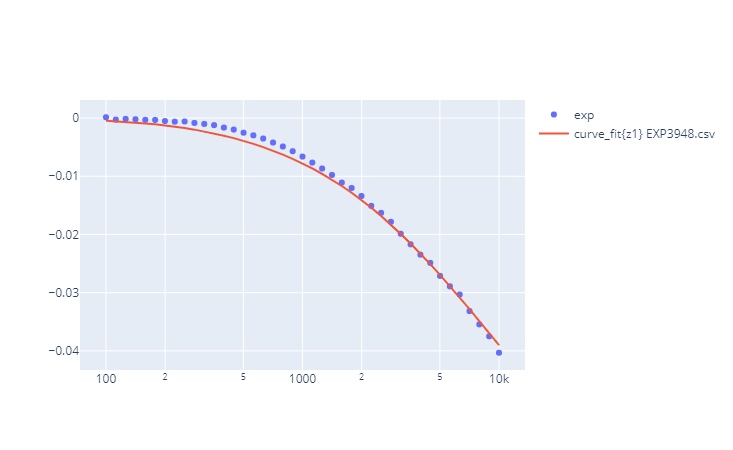

In [23]:
dp=15e-3
sig=4e6
mup=1
# valor ajustado y grafico

resultado= ci.fit.z1(f,bo,datacorr,0,dp,sig,mup)



figz1

In [22]:
z1eff=resultados[0]
fig=resultados[1]

In [28]:
type(resultado[1])

plotly.graph_objs._figure.Figure

mu = 16.57721499394157


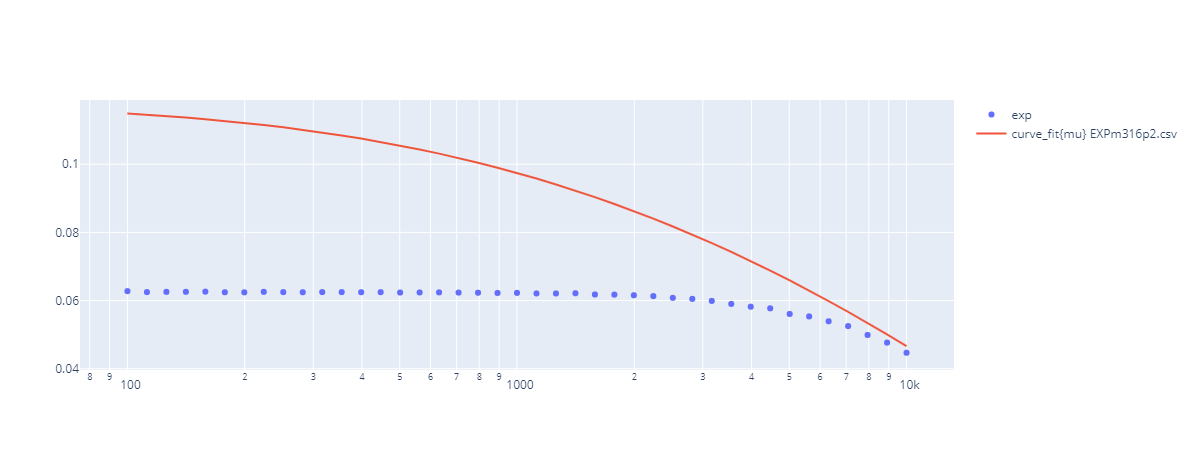

In [15]:
cosa=ci.fit.mu(f,bo,datacorr,1,4e6,z1eff)

pltmu